In [1]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
from utils import * # tic toc imshow
%load_ext line_profiler

import higra as hg

Image size: (481, 321)


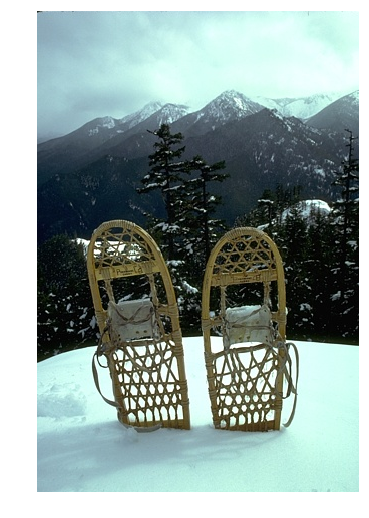

In [2]:
image = imageio.imread("data/2018.ppm")
# switch to float to avoir numerical issue with uint8
image = image.astype(np.float64)/255 
# discard the color channel
size = image.shape[:2]
print("Image size:", size)
imshow(image)

In [4]:
import scipy.io as sio
cob_results = sio.loadmat("data/2018_cob.mat")


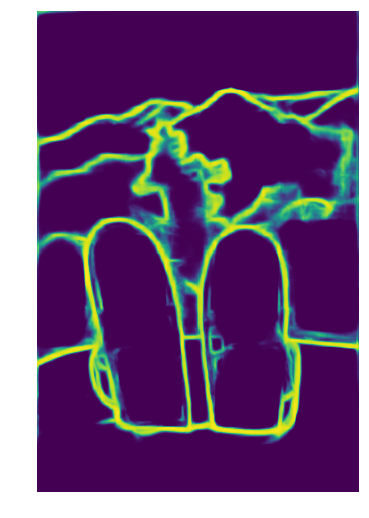

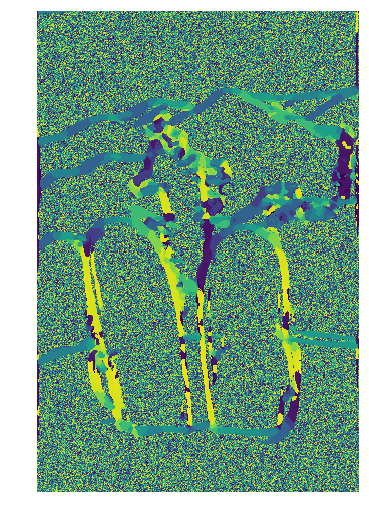

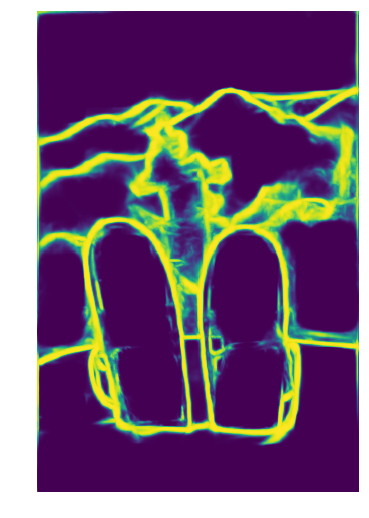

In [35]:
gradient = cob_results["E"][0][1]
gradient_orientation = cob_results["O"]["angle"][0][0]
gradient_confidence = cob_results["O"]["conf"][0][0]
gradient_confidence = np.max(gradient_confidence, axis=2)
gradient = gradient * gradient_confidence
imshow(gradient)
imshow(gradient_orientation)
imshow(gradient_confidence)


In [36]:
graph = hg.get_4_adjacency_graph(gradient.shape)
edge_weights = hg.weight_graph(graph, gradient, hg.WeightFunction.mean)
edge_orientations = hg.weight_graph(graph, gradient_orientation, hg.WeightFunction.mean)

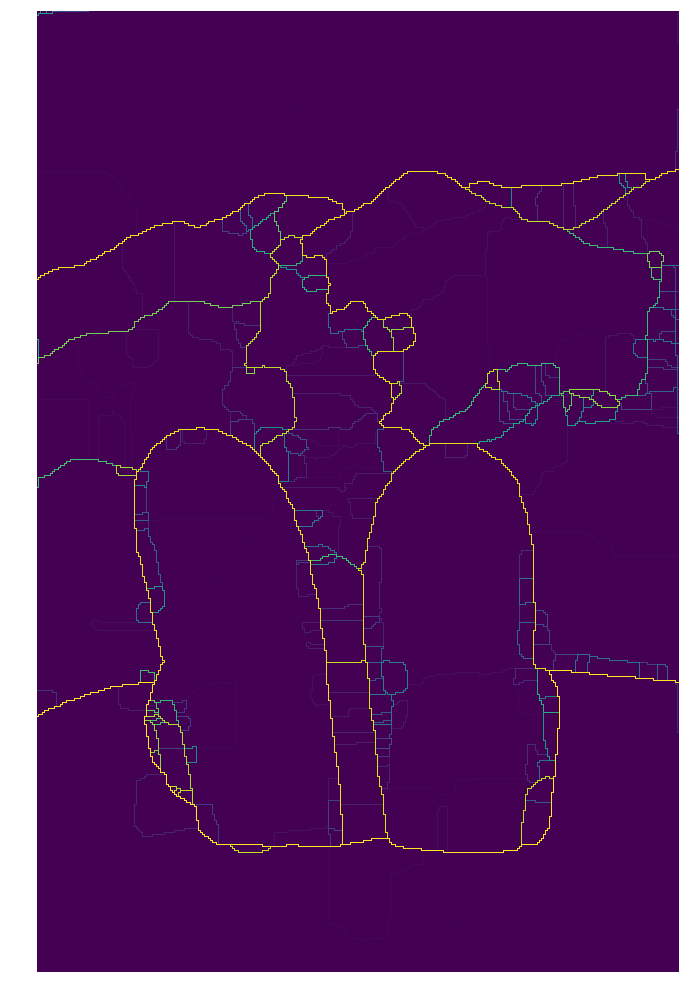

In [37]:
#%%timeit
tree = hg.mean_pb_hierarchy(graph, edge_weights=edge_weights)
rag = hg.get_attribute(tree, "leaf_graph")
sm_rag = hg.saliency(tree)
sm_graph = hg.rag_back_project_edge_weights(rag, sm_rag)
sm_viz = hg.graph_4_adjacency_2_khalimsky(graph, edge_weights=sm_graph)
sm_viz = 1./(1+np.exp(-4*(sm_viz-0.8)))
imshow(sm_viz)

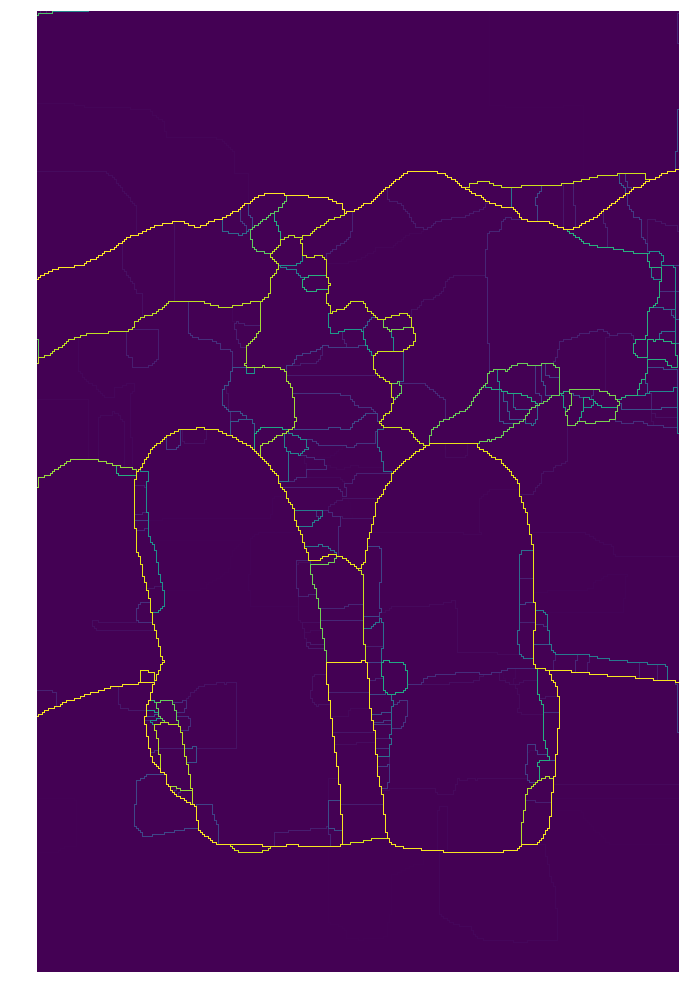

In [38]:
#%%timeit
tree = hg.mean_pb_hierarchy(graph, edge_weights=edge_weights, edge_orientations=edge_orientations)
rag = hg.get_attribute(tree, "leaf_graph")
sm_rag = hg.saliency(tree)
sm_graph = hg.rag_back_project_edge_weights(rag, sm_rag)
sm_viz = hg.graph_4_adjacency_2_khalimsky(graph, edge_weights=sm_graph)
#sm_viz = 1./(1+np.exp(-4*(sm_viz-0.8)))
imshow(sm_viz)

(963, 643, 2)


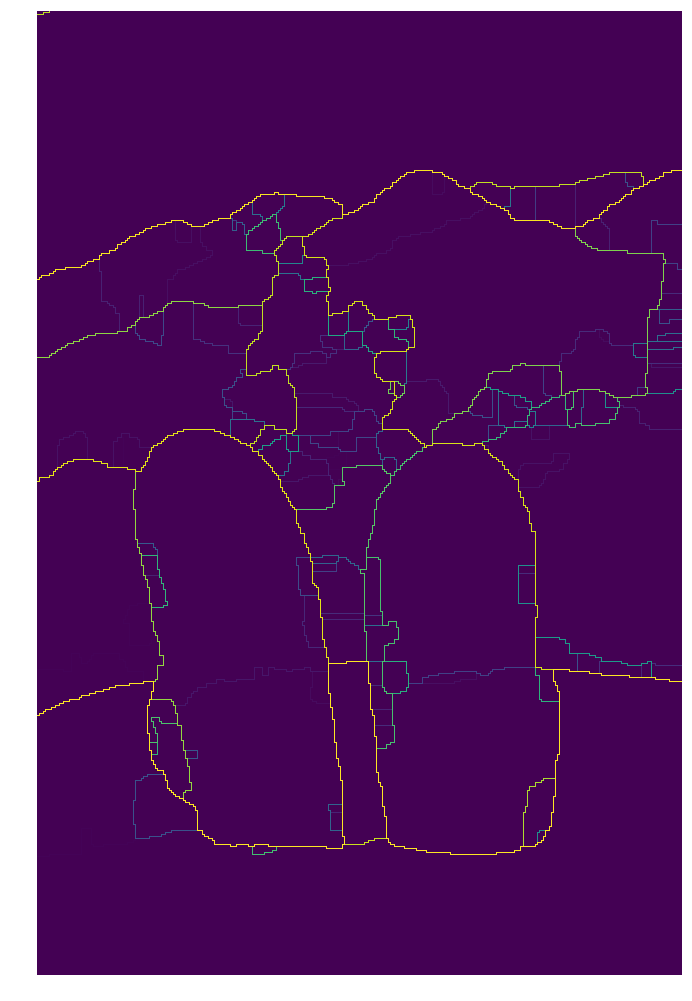

In [39]:
cob_ucm = cob_results["ucms"]
print(cob_ucm.shape)

imshow(cob_ucm[:, :, 1])